In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import UndefinedMetricWarning

In [76]:
# Loading the datasets provided by the user
X_test = pd.read_csv('X_test.csv', index_col=False)
X_train = pd.read_csv('X_train.csv', index_col=False)
y_test = pd.read_csv('y_test.csv', index_col=False)
y_train = pd.read_csv('y_train.csv', index_col=False)

In [77]:
X_test.head()

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.049874,-0.390530,-0.894539,0.457657,-0.509289,2.016399,1.077607,-0.107872,0.0,-1.488217
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.707154,-0.388355,-0.497199,0.457657,0.878568,-0.648666,0.456677,-0.107872,0.0,-1.488217
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.575781,-0.377479,-0.099858,0.759100,-1.203218,2.016399,-0.581209,-0.107872,0.0,-1.488217
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.229113,1.103855,2.482857,-0.676340,1.312273,-0.648666,-0.418562,5.555988,0.0,-1.488217
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.096928,-0.340500,1.290835,-0.618923,-1.203218,-0.648666,-0.154253,-0.107872,0.0,-1.488217


In [78]:
X_train.head()

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.179821,-0.394881,1.688175,0.328468,-1.116477,2.016399,-0.522561,-0.107872,0.0,-1.488217
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.235139,-0.368778,0.297483,-0.604568,1.312273,-0.648666,1.887050,-0.107872,0.0,-1.488217
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.210988,-0.377479,0.694824,-0.590214,-1.203218,-0.648666,0.952063,-0.107872,0.0,-1.488217
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.178809,-0.399231,-0.695869,-0.575859,0.965309,-0.648666,-0.475382,-0.107872,0.0,-1.488217
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.768171,1.132133,-0.894539,0.041380,1.312273,-0.648666,-0.071729,-0.107872,0.0,-1.488217


In [79]:
y_test.head()

,fraud_bool
0,0
1,0
2,0
3,0
4,0


In [80]:
y_train.head()

,fraud_bool
0,0
1,0
2,0
3,0
4,0


In [81]:
# Logistic Regression with LASSO (L1 penalty) and 10-fold cross-validation
logit_lasso = LogisticRegression(
    penalty='l1', 
    solver='liblinear',  # Supports L1 penalty
    max_iter=100
)

# Fix the shape of y_train
logit_lasso.fit(X_train, y_train.squeeze())

# Make predictions
y_pred = logit_lasso.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [82]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {fscore:.4f}')

Accuracy: 0.9893
Precision: 0.9851
Recall: 0.9893
F1-Score: 0.9842


In [108]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(2)

print("\nClassification Report Table:")
print(report_df)


Classification Report Table:
              precision  recall  f1-score    support
0                  0.99    1.00      0.99  247320.00
1                  0.59    0.01      0.02    2680.00
accuracy           0.99    0.99      0.99       0.99
macro avg          0.79    0.50      0.51  250000.00
weighted avg       0.99    0.99      0.98  250000.00


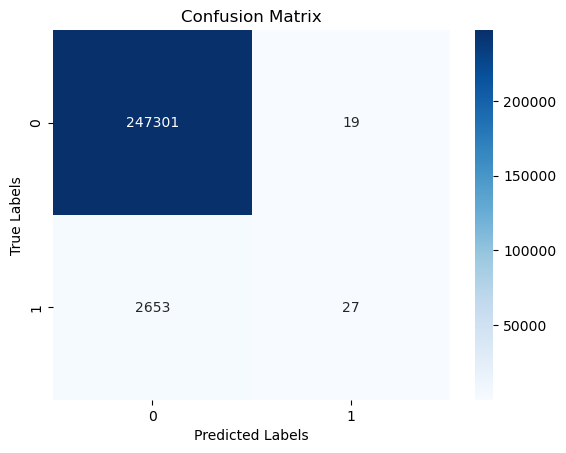

In [110]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [112]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Fit the model
logit_lasso = LogisticRegression(penalty='l1', solver='liblinear')
logit_lasso.fit(X_scaled, y_train.values.ravel())  # Flatten y if needed

# Now get the coefficients
coefficients_df = pd.DataFrame(logit_lasso.coef_, columns=X_train.columns)
print("\nlogit_lasso Coefficients:")
print(coefficients_df.T)


logit_lasso Coefficients:
                                         0
payment_type_AB                   0.081584
payment_type_AC                   0.270687
payment_type_AD                   0.070855
payment_type_AE                  -0.078146
employment_status_CB             -0.172220
employment_status_CC              0.044118
employment_status_CD             -0.094538
employment_status_CE             -0.120453
employment_status_CF             -0.230058
employment_status_CG              0.007853
housing_status_BB                -0.509459
housing_status_BC                -0.558405
housing_status_BD                -0.136471
housing_status_BE                -0.503605
housing_status_BF                -0.082251
housing_status_BG                -0.017337
source_TELEAPP                    0.038974
device_os_macintosh               0.176474
device_os_other                   0.118318
device_os_windows                 0.545376
device_os_x11                     0.046174
email_is_free_1            